In [2]:
import numpy as np
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


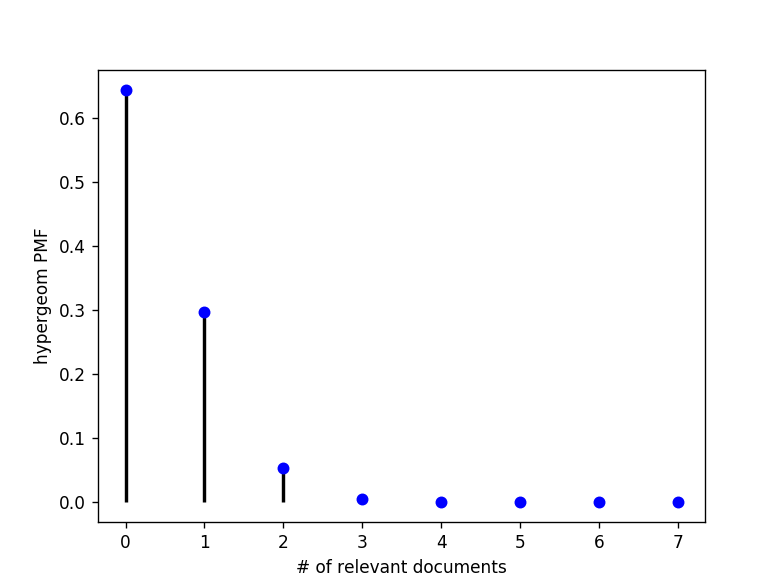

Text(0,0.5,'hypergeom PMF')

In [15]:
# M is the total number of objects, n is total number of Type I objects.
# The random variate represents the number of Type I objects in N draws without replacement from the total population.

[M, n, N] = [200, 7, 12]
rv = hypergeom(M, n, N)

x = np.arange(0, n+1)
pmf_array = rv.pmf(x)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, pmf_array, 'bo')
ax.vlines(x, 0, pmf_array, lw=2)
ax.set_xlabel('# of relevant documents')
ax.set_ylabel('hypergeom PMF')

In [3]:
mini, maxi = rv.interval(0.95)
mini = int(mini)
maxi = int(maxi)
print(mini)
print(maxi)

0
2


In [4]:
print(sum(pmf_array))
print(sum(pmf_array[mini:maxi+1]))
print(sum(pmf_array[0:mini]))
print(sum(pmf_array[maxi+1:]))

1.0000000000001432
0.9949022874484187
0
0.005097712551724615


In [5]:
x = np.arange(0, n+1)

for i in range(100):
    M = 300
    n = i
    N = 30
    rv = hypergeom(M, n, N)
    pmf_array = rv.pmf(x)
    
    mini, maxi = rv.interval(0.9)
    #print(int(mini), sum(pmf_array[0:int(mini)+1]))
    #print()
    if mini != rv.isf(0.95):
        print(mini, rv.isf(0.05))
    if maxi != rv.isf(0.05):
        print(maxi, rv.isf(0.95))

interval produces the same outcomes as ppm(1 - (1 - alpha)/2) or isf() with the respective alphas

200
200


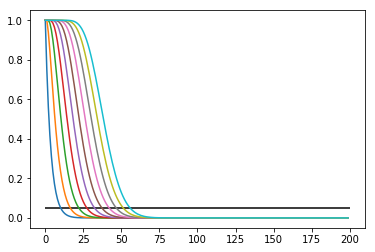

In [6]:
fig = plt.figure()


# test criterion
max_N = 200

# number of type I objects in N draws
x = np.array([0,1,2,3,4,5,6,7,8,9])
#x = np.array([0,0,0,0,0,1,1,1,1,1])
x = np.ones(max_N)

# total number of objects
M = np.ones(max_N) * 200
# number of type I objects
n = np.ones(max_N) * 50

# number of draws
N = np.arange(0, max_N)

print(len(N))
print(len(x))

for factor in range(10):
    cdf_array = hypergeom.cdf(factor*x, M, n, N)
    plt.plot(N, cdf_array)

plt.hlines(0.05, 0, min(max_N, M[0]))

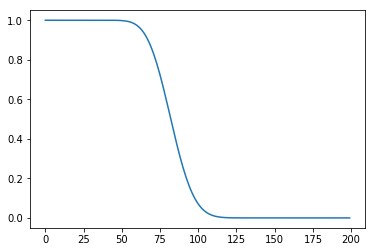

In [7]:

# test criterion
max_N = 200

x = 20*np.ones(max_N)

# total number of objects
M = np.ones(max_N) * 200

# number of draws
N = np.ones(max_N) * 50

# number of type I objects
n = np.arange(0, max_N)

cdf_array = hypergeom.cdf(x, M, n, N)
fig = plt.figure()
plt.plot(n, cdf_array)


In [8]:
# generate distribution of Fig. 2

# M is the total number of objects, n is total number of Type I objects.
# The random variate represents the number of Type I objects in N draws without replacement from the total population.

sample_size = np.arange(1, 2000)
total_number_items = 20000
type1_items = 1000

est_points = []

for i in sample_size:
    sample_type1 = np.arange(0, i+1)

    pmf_array = hypergeom.pmf(sample_type1, total_number_items, i, type1_items)
    #print(pmf_array, pmf_array.sum())
    r_est = sample_type1 * total_number_items / i
    x = np.repeat(i, i+1)
    est_points.append(np.column_stack((x, r_est, pmf_array)))
    
data = np.transpose(np.concatenate(est_points))

In [23]:
n_bins = 2000
cmax = data[2][-2000:].max() * total_number_items / n_bins / 10 * 2
cmap=plt.cm.Greens
cmap.set_under(color='white')
cmap.set_over(color='black')
fig = plt.figure()
plt.hist2d(data[0], data[1], bins=n_bins, range=None,
           weights=data[2], cmin=None, cmax=None,
           cmap=cmap, vmin=0.00001, vmax=cmax)
plt.ylim([0,2000])
plt.hlines([1000, 950], 0, 2000, color='grey', linewidth=1)
cbar = plt.colorbar(shrink=0.8, extend='max')
cbar.set_label('relative count')
plt.xlabel("documents drawn")
plt.ylabel("estimated number of relevant documents")

<IPython.core.display.Javascript object>

Text(0,0.5,'estimated number of relevant documents')

In [11]:
100/0.95

105.26315789473685

In [27]:
# for the whole sample

sample_size = np.arange(1, 20000, 10)
total_number_items = 20000
type1_items = 1000

est_points = []

for i in sample_size:
    sample_type1 = np.arange(0, i+1)

    pmf_array = hypergeom.pmf(sample_type1, total_number_items, i, type1_items)
    #print(pmf_array, pmf_array.sum())
    r_est = sample_type1 * total_number_items / i
    x = np.repeat(i, i+1)
    est_points.append(np.column_stack((x, r_est, pmf_array)))
    
data = np.transpose(np.concatenate(est_points))

<IPython.core.display.Javascript object>


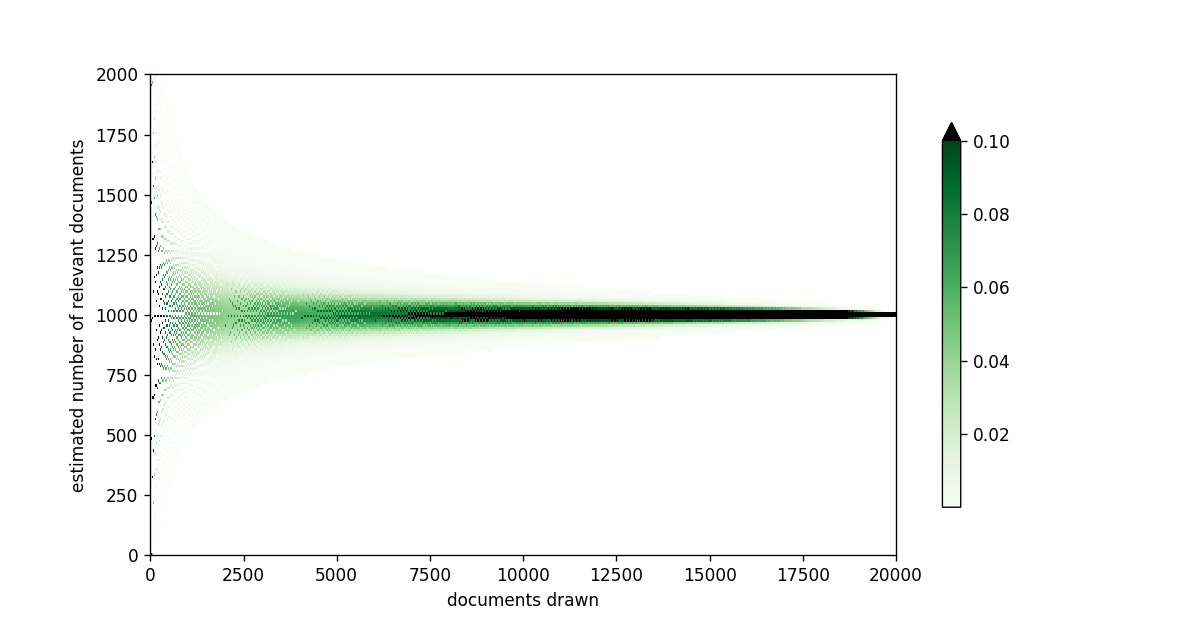

In [34]:
n_bins = 2000
cmap=plt.cm.Greens
cmap.set_under(color='white')
cmap.set_over(color='black')
fig = plt.figure()
plt.hist2d(data[0], data[1], bins=n_bins, range=None,
           weights=data[2], cmin=None, cmax=None,
           cmap=cmap, vmin=0.00001, vmax=0.1)
plt.ylim([0,2000])
plt.colorbar(shrink=0.8, extend='max')
plt.xlabel("documents drawn")
plt.ylabel("estimated number of relevant documents")
plt.show()

In [35]:
# probability that after 2000 draws, the BIR is estimated to be smaller than 95% of 5 %
# -> could be impossible to reach a required recall when stopping
hypergeom.cdf(95, total_number_items, 2000, type1_items)

0.316799169402765

In [37]:
# probability that after 2000 draws, the BIR is estimated to be larger than 5%
# -> stopping criterion at risk of not beeing reached before full sample has been seen
hypergeom.sf(100, total_number_items, 2000, type1_items) # sf = 1 - cdf

0.47328439802517186

3.0015442547635227
0.42194385774178944


<IPython.core.display.Javascript object>


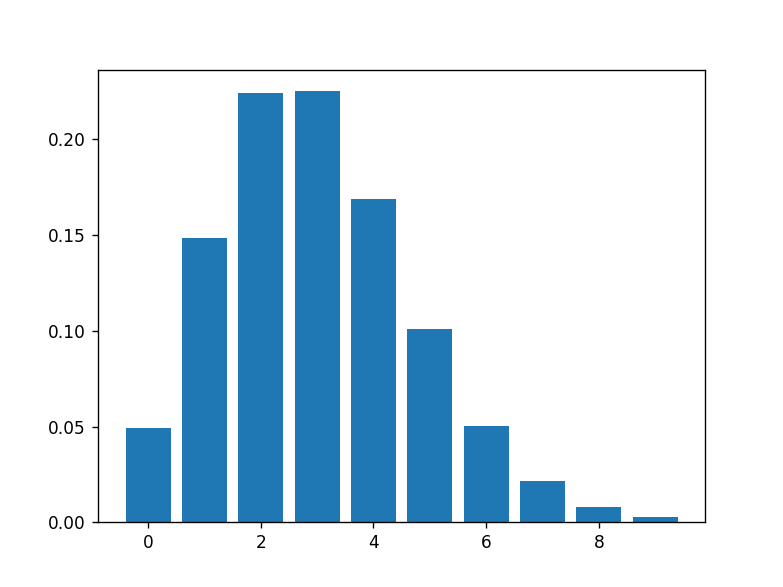

<BarContainer object of 10 artists>

In [47]:
# with numbers from Shemilt:
# case 1: N = 804 919, n = 6040, estimated relevant 400
rate = 400/804919
mean_results =  6040 * rate
print(mean_results) # -> found 3 relevant studies in sample
print(hypergeom.cdf(2,  804919, 6040, 400))
fig = plt.figure()
x = np.arange(10)
plt.bar(x, hypergeom.pmf(x, 804919, 6040, 400))

21.06551900165859
0.5519797682572096


<IPython.core.display.Javascript object>


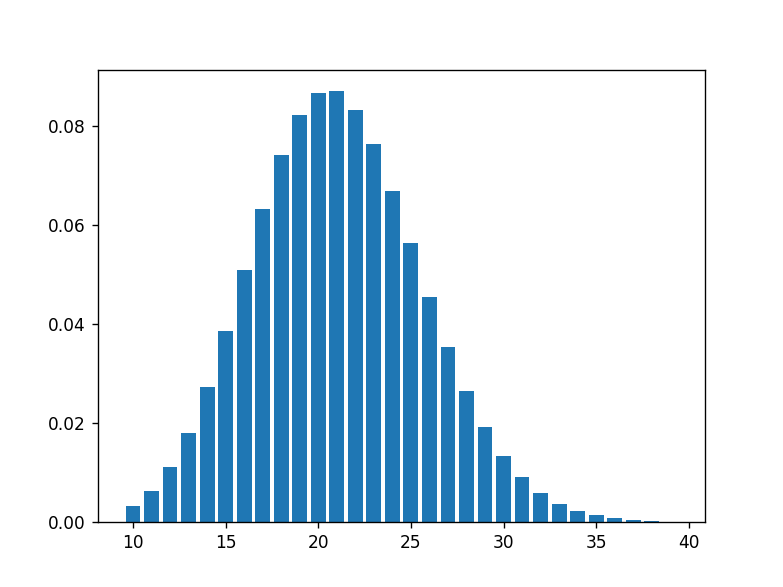

<BarContainer object of 30 artists>

In [50]:
# case 2: N = 1 053 908, n = 6051, estimated relevant 3669
rate = 3669/1053908
mean_results =  6051 * rate
print(mean_results) # -> found 21 relevant studies in sample
print(hypergeom.cdf(21, 1053908, 6051, 3669))
fig = plt.figure()
x = np.arange(10, 40)
plt.bar(x, hypergeom.pmf(x, 1053908, 6051, 3669))

In [4]:
# sample size calcultation:

def sample_size(N, pi, z, ME):
    return (N * ME**2 + z**2 * N * pi * (1-pi))/(N * ME**2 + pi * (1 - pi) * z**2)

sample_size(804919, 0.01, 1.96, 0.0025)

6040.429453044694

In [2]:
sample_size(1053908, 0.01, 1.96, 0.0025)

6051.156003564243

(0, 0.05)

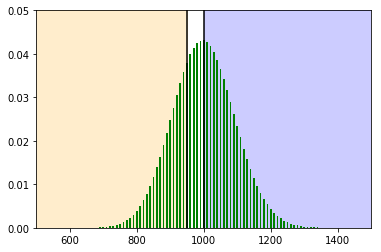

In [25]:
sample_size = 2000
total_number_items = 20000
type1_items = 1000

sample_type1 = np.arange(0, sample_size + 1)

pmf_array = hypergeom.pmf(sample_type1, total_number_items, sample_size, type1_items)
r_est = sample_type1 * total_number_items / sample_size
est_points = np.column_stack((r_est, pmf_array))
    
data = np.transpose(est_points)

fig = plt.figure()
ax = fig.gca()
ax.axvspan(0, 950, alpha=0.2, color='orange')
ax.axvspan(1000, 2000, alpha=0.2, color='blue')

plt.bar(data[0], data[1], width = 5, color = 'green', alpha=1)
plt.vlines([950, 1000], 0, 0.05)

plt.xlim([500,1500])
plt.ylim([0, 0.05])

In [9]:
data[0]

array([0.000e+00, 1.000e+01, 2.000e+01, ..., 1.998e+04, 1.999e+04,
       2.000e+04])